In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DATA import get_filtered_stock_data as gfs
from DATA import read_data
from DATA import delete_pickle_file
from Effient_Frontier import efficient_frontier 
from Effient_Frontier import get_mean_matrices
from Effient_Frontier import get_cov_matrices
from Get_name import get_company_names

In [2]:
#delete_pickle_file('ESG_US.csv.pickle')
#delete_pickle_file('ESG_DATA.csv.pickle')S

In [3]:
file_path = "ESG_US.csv"
esg = read_data(file_path)
column_name = 'environment_score'
column_value = 'High'
threshold = 0
operator = 'geq'
prefixes= ['US']
start_date = '2000-01-01'
end_date = '2020-01-01'

In [4]:
returns = gfs(file_path, column_name, column_value, prefixes, start_date, end_date, time='y', threshold=threshold, operator=operator)

In [5]:
returns.shape

(20, 334)

In [7]:
mu = get_mean_matrices(returns)
cov =  get_cov_matrices(returns)[1]
target = np.linspace(np.min(mu), np.max(mu), 100)
rf = 0.00
bounds = [(0, 1) for _ in range(len(mu))]
score = 'environment_score'
get_plots = False

In [16]:
max_sharpe_ret, max_sharpe_vol, max_sharpe_sr, portfolio_esg, frontier, mu, stdevs , w_opt = efficient_frontier(mu, cov, target, rf, bounds, returns, esg=esg, score=score,get_plots = False)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.332520049010508
            Iterations: 59
            Function evaluations: 19836
            Gradient evaluations: 59


In [17]:
combined_data = pd.DataFrame({'Column': get_company_names(returns.columns.to_numpy(), pd.read_csv("ESG_US.csv")), 'Weights': w_opt})
display(combined_data)

,Column,Weights
0,Aflac Incorporated,3.286350e-12
1,The AES Corporation,1.783192e-11
2,AT&T Inc.,3.948255e-12
3,Abbott Laboratories,8.231727e-03
4,"Activision Blizzard, Inc.",2.607643e-12
...,...,...
329,"The Williams Companies, Inc.",2.132805e-11
330,Xcel Energy Inc.,1.399724e-12
331,"Yum! Brands, Inc.",4.291229e-03
332,Zebra Technologies Corporation,5.318904e-13


Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.332520049010508
            Iterations: 59
            Function evaluations: 19836
            Gradient evaluations: 59


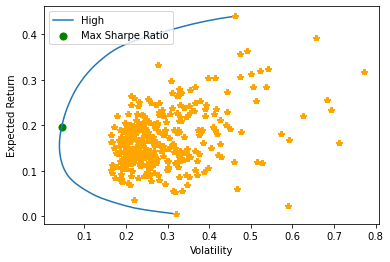

In [14]:
#Get the mean return of the stocks and the covariance matrix
mean = get_mean_matrices(returns)
cov = get_cov_matrices(returns)[1]
        
#Set the target, used for the efficient frontier module 
target = np.linspace(np.min(mean), np.max(mean), 100)
        
#Create the bounds
bounds = [(0, 1) for _ in range(len(mean))]
        
#Alot of computation here is unessecary for the backtest. 
max_sharpe_ret, max_sharpe_vol, max_sharpe_sr, portfolio_esg, frontier, mu, stdevs , w_opt  = efficient_frontier(mean, cov, target, rf, bounds, returns, esg=esg, score=score,get_plots=True)

plt.plot(frontier[:,1], frontier[:,0], label='High')
plt.plot(stdevs, mu, '*', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()

# Plot a red dot at the portfolio with the highest Sharpe ratio
plt.scatter(max_sharpe_vol, max_sharpe_ret, marker='o', color='g', s=50, label='Max Sharpe Ratio')
plt.show()
#plt.savefig('Effient frontier')

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.6563010735729353
            Iterations: 13
            Function evaluations: 246
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.7655332753041737
            Iterations: 54
            Function evaluations: 13289
            Gradient evaluations: 54
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.5815273224064823
            Iterations: 25
            Function evaluations: 1850
            Gradient evaluations: 25
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.7671083245127377
            Iterations: 1
            Function evaluations: 2
            Gradient evaluations: 1


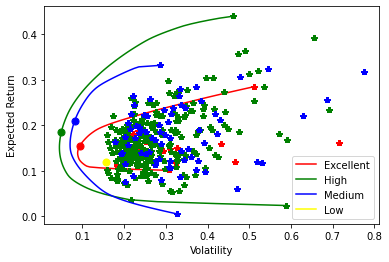

In [13]:
column_name = 'environment_level'

# Get returns 

returns1 = gfs(file_path, column_name, 'Excellent', prefixes, start_date, end_date, time='y', threshold=None, operator=operator)
returns2 = gfs(file_path, column_name, 'High' , prefixes, start_date, end_date, time='y', threshold=None, operator=operator)
returns3 = gfs(file_path, column_name, 'Medium' , prefixes, start_date, end_date, time='y', threshold=None, operator=operator)
returns4 = gfs(file_path, column_name, 'Low', prefixes, start_date, end_date, time='y', threshold=None, operator=operator)


#Get the mean return of the stocks and the covariance matrix
mean1 = get_mean_matrices(returns1)
cov1 = get_cov_matrices(returns1)[1]
mean2 = get_mean_matrices(returns2)
cov2 = get_cov_matrices(returns2)[1]
mean3 = get_mean_matrices(returns3)
cov3 = get_cov_matrices(returns3)[1]
mean4 = get_mean_matrices(returns4)
cov4 = get_cov_matrices(returns4)[1]
        
#Set the target, used for the efficient frontier module 
target1 = np.linspace(np.min(mean1), np.max(mean1), 100)
target2 = np.linspace(np.min(mean2), np.max(mean2), 100)
target3 = np.linspace(np.min(mean3), np.max(mean3), 100)
target4 = np.linspace(np.min(mean4), np.max(mean4), 100)
        
#Create the bounds
bounds1 = [(0, 1) for _ in range(len(mean1))]
bounds2 = [(0, 1) for _ in range(len(mean2))]
bounds3 = [(0, 1) for _ in range(len(mean3))]
bounds4 = [(0, 1) for _ in range(len(mean4))]
        
#Alot of computation here is unessecary for the backtest. 
max_sharpe_ret1, max_sharpe_vol1, max_sharpe_sr1, portfolio_esg1, frontier1, mu1, stdevs1 , w_opt1  = efficient_frontier(mean1, cov1, target1, rf, bounds1, returns1 , esg=esg, score=score,get_plots=True)
max_sharpe_ret2, max_sharpe_vol2, max_sharpe_sr2, portfolio_esg2, frontier2, mu2, stdevs2 , w_opt2  = efficient_frontier(mean2, cov2, target2, rf, bounds2, returns2 , esg=esg, score=score,get_plots=True)
max_sharpe_ret3, max_sharpe_vol3, max_sharpe_sr3, portfolio_esg3, frontier3, mu3, stdevs3 , w_opt3  = efficient_frontier(mean3, cov3, target3, rf, bounds3, returns3 , esg=esg, score=score,get_plots=True)
max_sharpe_ret4, max_sharpe_vol4, max_sharpe_sr4, portfolio_esg4, frontier4, mu4, stdevs4 , w_opt4  = efficient_frontier(mean4, cov4, target4, rf, bounds4, returns4 , esg=esg, score=score,get_plots=True)

plt.plot(frontier1[:,1], frontier1[:,0], label='Excellent', color='red')
plt.plot(stdevs1, mu1, '*', color='red')
plt.plot(frontier2[:,1], frontier2[:,0], label='High', color='green')
plt.plot(stdevs2, mu2, '*', color='green')
plt.plot(frontier3[:,1], frontier3[:,0], label='Medium', color='blue')
plt.plot(stdevs3, mu3, '*', color='blue')
plt.plot(frontier4[:,1], frontier4[:,0], label='Low', color='yellow')
plt.plot(stdevs4, mu4, '*', color='yellow')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()

# Plot a red dot at the portfolio with the highest Sharpe ratio
plt.scatter(max_sharpe_vol1, max_sharpe_ret1, marker='o', color='red', s=50, label='Max Sharpe Ratio Excellent')
plt.scatter(max_sharpe_vol2, max_sharpe_ret2, marker='o', color='green', s=50, label='Max Sharpe Ratio High')
plt.scatter(max_sharpe_vol3, max_sharpe_ret3, marker='o', color='blue', s=50, label='Max Sharpe Ratio Medium')
plt.scatter(max_sharpe_vol4, max_sharpe_ret4, marker='o', color='yellow', s=50, label='Max Sharpe Ratio Low')
plt.show()
#plt.savefig('Effient frontier_levels')